This is the 4th exercise of Andrew Ng's [Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome) written with Python3

## Training Neural Network

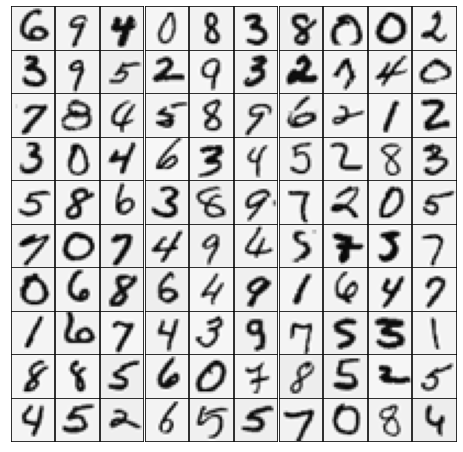

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import func
plt.rc('text',usetex=True)
plt.rc('font',family='Times New Roman')
%matplotlib inline
# Setup the parameters you will use for this exercise
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
#load data
dataMat = loadmat('data/ex4data1.mat')
X = dataMat['X']
y = dataMat['y']
#print(X.shape)
# show some of them
fig, ax = plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(10):
    for j in range(10):
        n = np.random.randint(0,5000)
        ax[i,j].imshow(X[n,:].reshape(20,20,order='F'),cmap='binary')
        ax[i,j].set(xticks=[],yticks=[])

In [2]:
# regularization parameter 
lam = 1
# Check gradients by running checkNNGradients
func.checkNNGradients(lam)
# Compute cost function and gradient
Theta1 = func.randiniweight(input_layer_size, hidden_layer_size)
Theta2 = func.randiniweight(hidden_layer_size, num_labels)
nnTheta = np.concatenate([Theta1.ravel(),Theta2.ravel()])
J = func.nncostfunc(nnTheta, X, y, lam, input_layer_size, hidden_layer_size, num_labels)
grad = func.nngradient(nnTheta, X, y, lam, input_layer_size, hidden_layer_size, num_labels)

Neural Network, Numercial
[[-0.03280577 -0.03280577]
 [-0.12094773 -0.12094773]
 [-0.16381574 -0.16381574]
 [ 0.03407086  0.03407086]
 [ 0.07049267  0.07049267]
 [ 0.15728502  0.15728502]
 [ 0.02395466  0.02395466]
 [-0.05431445 -0.05431445]
 [ 0.01419894  0.01419894]
 [-0.0390218  -0.0390218 ]
 [ 0.10470961  0.10470961]
 [-0.03210613 -0.03210613]
 [ 0.03227141  0.03227141]
 [ 0.05885794  0.05885794]
 [ 0.16440851  0.16440851]
 [-0.096423   -0.096423  ]
 [ 0.0609162   0.0609162 ]
 [ 0.17204167  0.17204167]
 [ 0.16772858  0.16772858]
 [ 0.07314376  0.07314376]
 [ 0.41676836  0.41676836]
 [ 0.07460186  0.07460186]
 [ 0.24786775  0.24786775]
 [ 0.28537608  0.28537608]
 [ 0.2049044   0.2049044 ]
 [ 0.36838152  0.36838152]
 [ 0.07027801  0.07027801]
 [-0.13179248 -0.13179248]
 [-0.02103504 -0.02103504]
 [ 0.14817984  0.14817984]
 [ 0.17711244  0.17711244]
 [ 0.00913307  0.00913307]
 [-0.34813143 -0.34813143]
 [-0.05877854 -0.05877854]
 [-0.28726577 -0.28726577]
 [-0.24327189 -0.24327189]
 [

In [3]:
# Training NN
from scipy.optimize import fmin_cg
args = (X,y,lam,input_layer_size, hidden_layer_size, num_labels)
Theta = fmin_cg(f=func.nncostfunc, x0=nnTheta, fprime=func.nngradient, args=args, maxiter=50)

         Current function value: 0.449177
         Iterations: 50
         Function evaluations: 117
         Gradient evaluations: 117


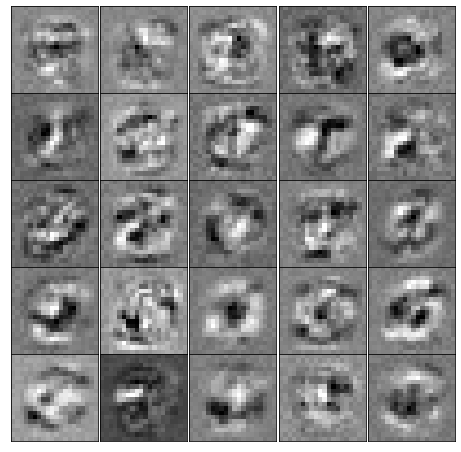

In [4]:
# Visualize Weights
Theta1 = Theta[:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size,(input_layer_size+1))
Theta2 = Theta[hidden_layer_size*(input_layer_size+1):].reshape(num_labels,(hidden_layer_size+1))
fig, ax = plt.subplots(5,5,figsize=(8,8))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(Theta1[i*5+j,1:].reshape(20,20,order='F'),cmap='binary')
        ax[i,j].set(xticks=[],yticks=[])

In [5]:
# Implement Predict
pred = func.predictnn(Theta1, Theta2, X)
print('The Train Accuracy is about {0:.1f}%'.format(np.mean((pred == y)) * 100))

The Train Accuracy is about 96.6%


Neural Network Prediction: 2


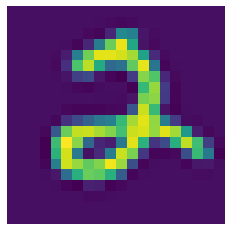

In [6]:
# Randomly permute examples
n = np.random.randint(0,5000)
plt.imshow(X[n,:].reshape(20,20,order='F'))
plt.axis('off');
p = func.predictnn(Theta1, Theta2, X[n,:].reshape(1,-1))
print('Neural Network Prediction: {0}'.format(p[0,0]%10))